# Настройка окружения

In [ ]:
%%time
import os
!pip install uv
!uv venv .venv --python 3.10
!source .venv/bin/activate
!pip install -q alignn
!pip uninstall dgl -y
!uv pip install -q --no-cache-dir dgl -f https://data.dgl.ai/wheels/torch-2.2/cu121/repo.html

Using CPython 3.10.12 interpreter at: /usr/bin/python3.10
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Found existing installation: dgl 1.1.1
Uninstalling dgl-1.1.1:
  Successfully uninstalled dgl-1.1.1
CPU times: user 3.6 s, sys: 667 ms, total: 4.27 s
Wall time: 19.7 s


In [ ]:
import os
!pwd
os.chdir('/content')
# Clone ALIGNN repo to get example folder
if not os.path.exists('alignn'):
  !git clone https://github.com/usnistgov/alignn.git

os.chdir('alignn')

/content
Cloning into 'alignn'...
remote: Enumerating objects: 5324, done.
remote: Counting objects: 100% (1618/1618), done.
remote: Compressing objects: 100% (556/556), done.
remote: Total 5324 (delta 1315), reused 1089 (delta 1061), pack-reused 3706 (from 3)
Receiving objects: 100% (5324/5324), 155.09 MiB | 12.57 MiB/s, done.
Resolving deltas: 100% (3249/3249), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Тестовый запуск ALIGNN (Предсказание band gap)

In [ ]:
#Regression
!rm -rf *data
!train_alignn.py --root_dir "alignn/examples/sample_data" --config "alignn/examples/sample_data/config_example.json" --output_dir=temp

DGL backend not selected or invalid.  Assuming PyTorch for now.
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
world_size 1
root_dir alignn/examples/sample_data
id_prop_csv_file exists True
len dataset 50
train_stress False
Using LMDB dataset.
MAX val: 6.149
MIN val: 0.0
MAD: 1.0520696
Baseline MAE: 2.3805500000000004
data range 4.907 0.0
line_graph True
100% 40/40 [00:01<00:00, 34.36it/s]
data range 1.569 0.0
line_graph True
100% 5/5 [00:00<00:00, 36.77it/s]
data range 6.149 0.0
line_graph True
100% 5/5 [00:00<00:00, 35.58it/s]
n_train: 40
n_val  : 5
n_test : 5
rank 0
world_size 1
config: {'version': '112bbedebdaecf59fb18e11c929080fb2f358246', 'dataset': 'user_data', 'target': 'target', 'atom_features': 'cgcnn', 'neighbor_strategy': 'k-nearest', 'id_tag': 'jid', 'dtype': 'float32', 'random_seed': 123, 'classification_threshold': None

# Тестовый запуск обучения на одном параметре k_1064

In [ ]:
#Regression
os.chdir('/content')
!train_alignn.py --root_dir "drive/MyDrive/alignn/alignn_data" --config "drive/MyDrive/alignn/config_example.json" --output_dir=temp

fatal: not a git repository (or any of the parent directories): .git
world_size 1
root_dir drive/MyDrive/alignn/alignn_data
id_prop_csv_file exists True
len dataset 8586
train_stress False
Using LMDB dataset.
MAX val: 4.92489910736036
MIN val: 0.0
MAD: 0.2554983742056512
Baseline MAE: 0.22914360414549642
data range 4.92489910736036 4.5216015119897497e-05
line_graph True
100% 6868/6868 [02:41<00:00, 42.40it/s]
data range 3.720222773061368 0.0
line_graph True
100% 858/858 [00:24<00:00, 34.63it/s]
data range 2.9435545702461887 0.0003154817802712
line_graph True
100% 858/858 [00:18<00:00, 45.65it/s]
n_train: 6868
n_val  : 858
n_test : 858
rank 0
world_size 1
config: {'version': '112bbedebdaecf59fb18e11c929080fb2f358246', 'dataset': 'user_data', 'target': 'target', 'atom_features': 'cgcnn', 'neighbor_strategy': 'k-nearest', 'id_tag': 'jid', 'dtype': 'float32', 'random_seed': 123, 'classification_threshold': None, 'n_val': None, 'n_test': None, 'n_train': None, 'train_ratio': 0.8, 'val_ratio

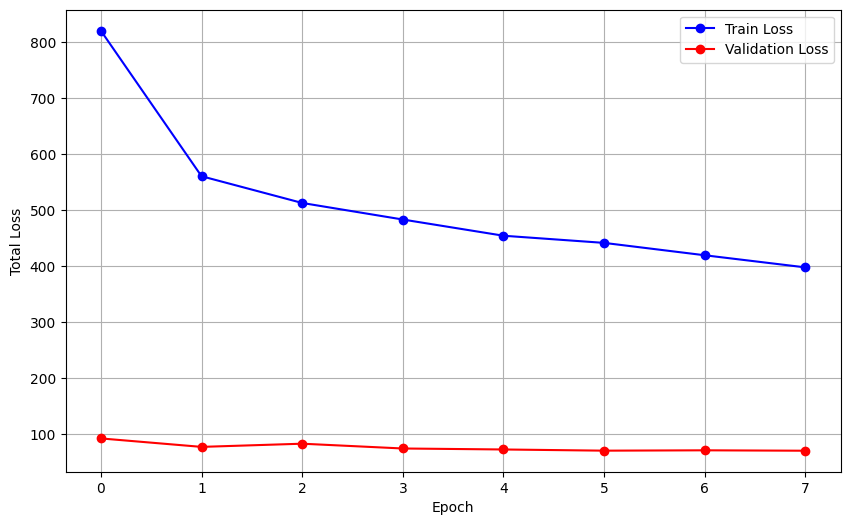

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# from scipy.optimize import curve_fit

epochs = [0, 1, 2, 3, 4, 5, 6, 7]
train_total = [819.7954, 560.3023, 512.6034, 483.0778, 454.1827, 441.4113, 419.3309, 397.7093]
val_total = [92.6828, 77.5936, 83.2728, 74.7274, 72.9685, 70.8532, 71.4759, 70.7489]

# def exponential_decay(x, A, B):
#     return A * np.exp(-B * x)

# params, covariance = curve_fit(exponential_decay, epochs, train_total, p0=[800, 0.1])

# log_train = np.log(train_total)

# Линейная регрессия для ln(y) = k*x + b
# k, b = np.polyfit(epochs, log_train, 1)
# B = -k
# A = np.exp(b)

# x = np.linspace(0, 20, 100)
# # trendline = exponential_decay(x, *params)
# trendline = A * np.exp(-B * x)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_total, 'b-o', label='Train Loss')
plt.plot(epochs, val_total, 'r-o', label='Validation Loss')
# plt.plot(x, trendline, 'g--', label=f'Аппроксимация')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.legend()
plt.grid(True)
plt.show()

# Обучения на k_1064, k_755, k_1500

In [ ]:
#Regression
os.chdir('/content')
!train_alignn.py --root_dir "drive/MyDrive/alignn/alignn_data" --config "drive/MyDrive/alignn/config_k.json" --output_dir=temp_ks

fatal: not a git repository (or any of the parent directories): .git
world_size 1
root_dir drive/MyDrive/alignn/alignn_data
id_prop_csv_file exists True
len dataset 5961
train_stress False
multioutput True
lists_length_equal True 3
Using LMDB dataset.
Data error Boolean value of Tensor with more than one value is ambiguous
data range 6.7109952669829545 4.348977225287308e-05
line_graph True
100% 4768/4768 [00:00<00:00, 2807981.11it/s]
Reading dataset Atrain_data
data range 4.408488083342374 0.0
line_graph True
100% 596/596 [00:00<00:00, 2334085.14it/s]
Reading dataset Aval_data
data range 4.8731407918931 0.000225536621609
line_graph True
100% 596/596 [00:00<00:00, 2537873.28it/s]
Reading dataset Atest_data
n_train: 50
n_val  : 6
n_test : 6
rank 0
world_size 1
config: {'version': '112bbedebdaecf59fb18e11c929080fb2f358246', 'dataset': 'user_data', 'target': 'target', 'atom_features': 'cgcnn', 'neighbor_strategy': 'k-nearest', 'id_tag': 'jid', 'dtype': 'float32', 'random_seed': 42, 'classi

# Графики для модели предсказания k_1064, k_755, k_1500
## 1) target & predict

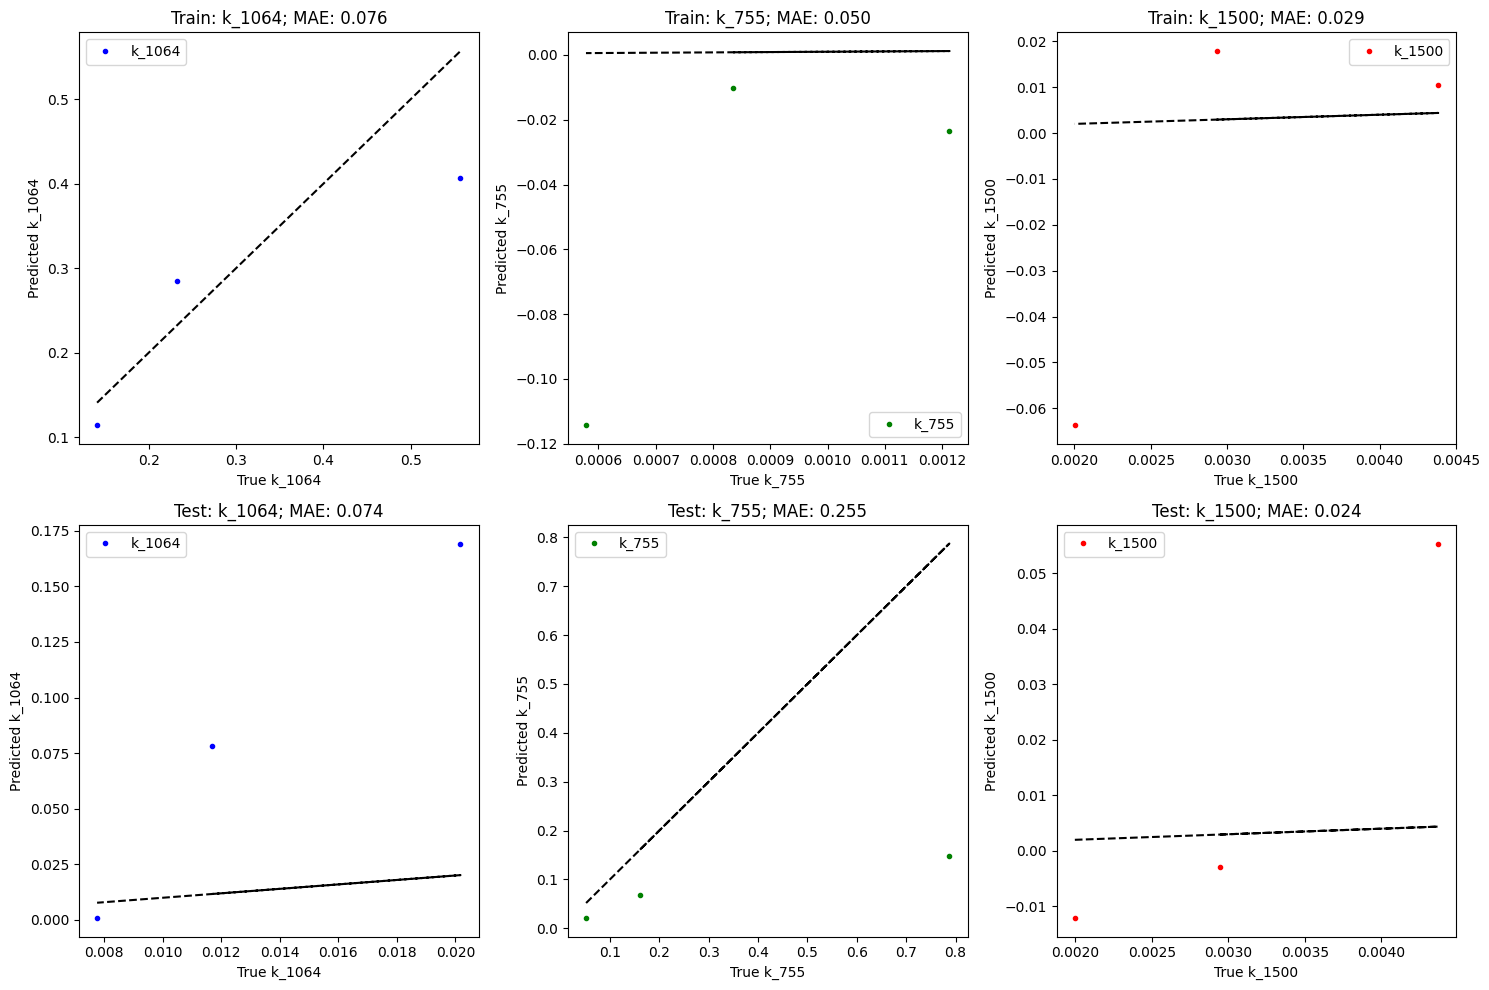


Overall MAE:
k_1064:
  Train MAE: 0.0764
num points: 3
  Test MAE:  0.0741
num points: 3
k_755:
  Train MAE: 0.0502
num points: 3
  Test MAE:  0.2548
num points: 3
k_1500:
  Train MAE: 0.0289
num points: 3
  Test MAE:  0.0236
num points: 3


In [ ]:
# !pip install sklearn
from jarvis.db.jsonutils import loadjson
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.metrics import mean_absolute_error
import numpy as np

# Загрузка данных
train_data = loadjson('temp_ks/Train_results.json')
test_data = loadjson('temp_ks/Test_results.json')

x_train, y_train = np.array([i['target_out'][0] for i in train_data]), np.array([i['pred_out'][0] for i in train_data])
x_test, y_test = np.array([i['target_out'][0] for i in test_data]), np.array([i['pred_out'] for i in test_data])

plt.figure(figsize=(15, 10))
labels = ['k_1064', 'k_755', 'k_1500']
colors = ['blue', 'green', 'red']

for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.plot(x_train[i], y_train[i], '.', color=colors[i], label=labels[i])
    plt.plot(x_train[i], x_train[i], 'k--')
    plt.xlabel('True ' + labels[i])
    plt.ylabel('Predicted ' + labels[i])
    mae = np.sum(np.abs(x_train[i] - y_train[i]))/len(x_train[i])
    plt.title(f'Train: {labels[i]}; MAE: {mae:.3f}')
    plt.legend()

for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.plot(x_test[i], y_test[i], '.', color=colors[i], label=labels[i])
    plt.plot(x_test[i], x_test[i], 'k--')
    plt.xlabel('True ' + labels[i])
    plt.ylabel('Predicted ' + labels[i])
    mae = np.sum(np.abs(x_test[i] - y_test[i]))/len(x_train[i])
    plt.title(f'Test: {labels[i]}; MAE: {mae:.3f}')
    plt.legend()


plt.tight_layout()
plt.show()

print("\nOverall MAE:")
for i, label in enumerate(labels):
    print(f"{label}:")
    print(f"  Train MAE: {np.sum(np.abs(x_train[i] - y_train[i]))/len(x_train[i]):.4f}")
    print(f'num points: {len(x_train[i])}')
    print(f"  Test MAE:  {np.sum(np.abs(x_test[i] - y_test[i]))/len(x_train[i]):.4f}")
    print(f'num points: {len(x_test[i])}')

## 2) loss & epoches

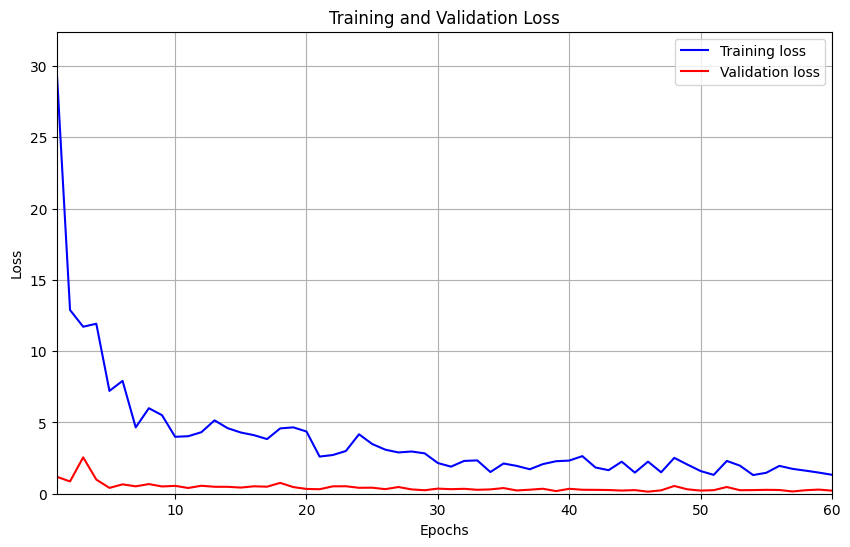

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
with open('temp_ks/history_train.json') as f:
    train_history = json.load(f)

with open('temp_ks/history_val.json') as f:
    val_history = json.load(f)

# Извлечение значений loss (первый элемент в каждом подсписке)
train_loss = [epoch[0] for epoch in train_history]
val_loss = [epoch[0] for epoch in val_history]

# Создание графика
plt.figure(figsize=(10, 6))
epochs = np.arange(1, len(train_loss)+1)

plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Настройка осей
plt.xlim(1, len(train_loss))
plt.ylim(0, max(max(train_loss), max(val_loss)) * 1.1)

plt.show()